In [ ]:
import tweepy
import csv
import numpy as np
from textblob import TextBlob
from keras.models import Sequential
from keras.layers import Dense


#Step 1 - Insert your API keys
consumer_key= 'CONSUMER_KEY_HERE'
consumer_secret= 'CONSUMER_SECRET_HERE'
access_token='ACCESS_TOKEN_HERE'
access_token_secret='ACCESS_TOKEN_SECRET_HERE'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

#Step 2 - Search for your company name on Twitter
public_tweets = api.search('company_name')


#Step 3 - Define a threshold for each sentiment to classify each 
#as positive or negative. If the majority of tweets you've collected are positive
#then use your neural network to predict a future price
for tweet in public_tweets:    
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)
    

#data collection
dates = []
prices = []
def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
    return

#Step 5 reference your CSV file here
get_data('your_company_stock_data.csv')

#Step 6 In this function, build your neural network model using Keras, train it, then have it predict the price 
#on a given day. We'll later print the price out to terminal.
def predict_prices(dates, prices, x):

predicted_price = predict_price(dates, prices, 29)
print(predicted_price)

In [119]:
#Step 6 In this function, build your neural network model using Keras, train it, then have it predict the price 
#on a given day. We'll later print the price out to terminal.


def predict_prices(dates, prices, x):
    prices = np.array(prices).astype(float)

    maxx= prices.max()
    minn= prices.min()
    prices = (prices - minn)/(maxx - minn)

    #dataset = np.array(prices).reshape(len(dates),1)
    dataset = np.column_stack((dates,prices))
    
    n_data = len(dataset)

    train_size = int(n_data * 0.8)
    test_size = n_data - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:n_data,:]

#     # convert an array of values into a dataset matrix
#     def create_dataset(dataset, look_back=1):
#         dataX, dataY = [], []
#         for i in range(len(dataset)-look_back-1):
#             a = dataset[i:(i+look_back), 0]
#             dataX.append(a)
#             dataY.append(dataset[i + look_back, 0])
#         return np.array(dataX), np.array(dataY)
#     look_back = 1
#     trainX, trainY = create_dataset(train, look_back)
#     testX, testY = create_dataset(test, look_back)

    trainX, trainY = train[np.arange(len(train)),0] , train[np.arange(len(train)),1]
    testX, testY = test[np.arange(len(test)),0] , test[np.arange(len(test)),1]
    
    # create and fit Multilayer Perceptron model
    model = Sequential()
    model.add(Dense(4, input_dim=1, activation='relu'))
    model.add(Dense(8, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='nadam')
    model.fit(trainX, trainY, epochs=30, batch_size=8, verbose=2)
    
    
    # Estimate model performance
    trainScore = model.evaluate(trainX, trainY, verbose=0)
    print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
    testScore = model.evaluate(testX, testY, verbose=0)
    print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

    truePredict = dataset[:,1]*(maxx-minn)+minn
    # generate predictions for training
    trainPredict = model.predict(trainX)*(maxx-minn)+minn
    testPredict = model.predict(testX)*(maxx-minn)+minn


    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[:len(trainPredict), :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict):len(dataset), :] = testPredict

    # plot baseline and predictions
    plt.plot(truePredict)
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()

    return model.predict([x])[0]*(maxx-minn)+minn

In [ ]:
import tweepy
import csv
import numpy as np
from textblob import TextBlob
from keras.models import Sequential
from keras.layers import Dense


#Step 1 - Insert your API keys
consumer_key= 'CONSUMER_KEY_HERE'
consumer_secret= 'CONSUMER_SECRET_HERE'
access_token='ACCESS_TOKEN_HERE'
access_token_secret='ACCESS_TOKEN_SECRET_HERE'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)



Epoch 1/30
 - 1s - loss: 0.0151
Epoch 2/30
 - 0s - loss: 0.0093
Epoch 3/30
 - 0s - loss: 0.0082
Epoch 4/30
 - 0s - loss: 0.0066
Epoch 5/30
 - 0s - loss: 0.0067
Epoch 6/30
 - 0s - loss: 0.0059
Epoch 7/30
 - 0s - loss: 0.0048
Epoch 8/30
 - 0s - loss: 0.0047
Epoch 9/30
 - 0s - loss: 0.0041
Epoch 10/30
 - 0s - loss: 0.0041
Epoch 11/30
 - 0s - loss: 0.0039
Epoch 12/30
 - 0s - loss: 0.0042
Epoch 13/30
 - 0s - loss: 0.0041
Epoch 14/30
 - 0s - loss: 0.0044
Epoch 15/30
 - 0s - loss: 0.0039
Epoch 16/30
 - 0s - loss: 0.0036
Epoch 17/30
 - 0s - loss: 0.0036
Epoch 18/30
 - 0s - loss: 0.0037
Epoch 19/30
 - 0s - loss: 0.0035
Epoch 20/30
 - 0s - loss: 0.0037
Epoch 21/30
 - 0s - loss: 0.0035
Epoch 22/30
 - 0s - loss: 0.0034
Epoch 23/30
 - 0s - loss: 0.0036
Epoch 24/30
 - 0s - loss: 0.0034
Epoch 25/30
 - 0s - loss: 0.0035
Epoch 26/30
 - 0s - loss: 0.0032
Epoch 27/30
 - 0s - loss: 0.0035
Epoch 28/30
 - 0s - loss: 0.0032
Epoch 29/30
 - 0s - loss: 0.0034
Epoch 30/30
 - 0s - loss: 0.0034
Train Score: 0.00 M

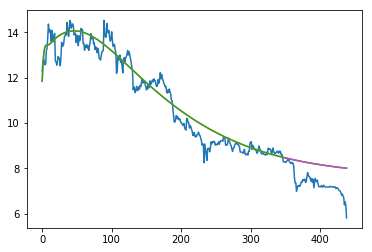

the predicted price on day 29 is  [13.934954]


In [122]:
#Step 2 - Search for your company name on Twitter
public_tweets = api.search('Huawei')

count = 0
for tweet in public_tweets:    
    analysis = TextBlob(tweet.text)
    if analysis.sentiment.polarity > 0.25:
        count +=1

if count/len(public_tweets) > 0.3:
    from bs4 import BeautifulSoup
    import math
    import matplotlib.pyplot as plt


    f = open("data.txt", "r")
    html = f.read()
    f.close()

    parsed_html = BeautifulSoup(html, "html5lib")

    data = parsed_html.body.findAll('tr')
    prices = []
    for ddata in data:
        price = ddata.findAll('td')[1].text
        prices.append(price)

    # prices from the first entry to the last
    prices.reverse()
    dates = np.arange(len(prices))

    predicted_price = predict_prices(dates, prices, 29)
    print("the predicted price on day 29 is ",predicted_price)
    
else:
    print("the company does not have good comments")